<h1>Atividade 1 - Parte A – Reconhecimento de Imagens e Visão Computacional</h1>

Grupo:<br>
    Aderson Lucas Guimarães Mendonça Medeiros<br>
    Andrei Ben-Hur do Rego Paz<br>
    Tiago Rocha de Almeida

<b>Exercício 1</b>

a) Crie uma função (em Python)  que seja capaz de reduzir e/ou aumentar a resolução espacial de uma imagem por um fator n, que é um número real positivo (n>1 para um aumento da resolução espacial e n< 1 para uma redução da resolução espacial).  Tal função deve possuir como parâmetros de entrada, o nome do arquivo da imagem para leitua no disco e o fator n. Para aumento da resolução utilize a técnica do vizinho-mais-próximo vista em sala de aula. 

In [1]:
# imports packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
# funcao para redimensionar a imagem
def rescale_image(image_ri, proportion_ri, interpolation=None):
    #   avalia se o parametro que foi passado para a imagem foi um caminho para o
    #    arquivo ou uma imagem em forma de numpy array
    image_result = np.array([])
    if type(image_result) == str:
        image_result = cv2.imread(image_ri)
    elif type(image_result) == np.ndarray:
        image_result = np.copy(image_ri)
    # Se o parametro de proporção for maior que 1 será feita interpolação dependendo
    # do parametro interpolação
    if proportion_ri >= 1:
        if interpolation == 'vizinho':
            image_result = rescale_image_neighbor(image_result, proportion_ri)
        elif interpolation == 'bilinear':
            image_result = rescale_image_bilinear(image_result, proportion_ri)
    
    # Esse caso se refere à redução das proporções e nesse caso trataremos de
    #  eliminar pixels
    elif proportion_ri > 0:
        proportion_division = 1/proportion_ri
        row, col = image_result.shape[:2]
        row_scale = [r for r in range(row) if not (int(r%proportion_division) == 0)]
        col_scale = [c for c in range(col) if not (int(c%proportion_division) == 0)]
        image_result = np.delete(image_result, row_scale, axis=0)
        image_result = np.delete(image_result, col_scale, axis=1)
    return image_result

In [3]:
# funcao para aumentar a proporção da imagem utilizando vizinho mais próximo
def rescale_image_neighbor(image, proportion):
    image_rescale = np.copy(image)
    # get the row, column and channel lengths
    row, col = image.shape[:2]
    new_row, new_col = \
        [np.floor(entry*proportion) for entry in image_rescale.shape[:2]]
    row_index = 1
    resto_sum = 0
    while row_index < new_row:
        qtd_row_insert = proportion - 1
        while qtd_row_insert >= 0:
            if qtd_row_insert >= 1:
                image_rescale = np.insert(image_rescale,
                                            row_index, 
                                            image_rescale[row_index-1,:], 
                                            axis=0)
                row_index += 1
                qtd_row_insert -= 1
            elif qtd_row_insert >= 0:
                resto_sum += qtd_row_insert
                row_index += 1
                qtd_row_insert -= 1
            if resto_sum >= 1:
                image_rescale = np.insert(image_rescale, row_index, 0, axis=0)
                row_index += 1
                resto_sum -= 1
            row, _ = image_rescale.shape[:2]

    col_index = 1
    resto_sum = 0
    while col_index < new_col:
        qtd_col_insert = proportion - 1
        while qtd_col_insert >= 0:
            if qtd_col_insert >= 1:
                image_rescale = np.insert(image_rescale,
                                          col_index,
                                          image_rescale[:,col_index-1],
                                          axis=1)
                col_index += 1
                qtd_col_insert -= 1
            elif qtd_col_insert >= 0:
                resto_sum += qtd_col_insert
                col_index += 1
                qtd_col_insert -= 1
            if resto_sum >= 1:
                image_rescale = np.insert(image_rescale,
                                          col_index,
                                          image_rescale[:,col_index-1],
                                          axis=1)
                col_index += 1
                resto_sum -= 1
            _, col = image_rescale.shape[:2]
            
    return image_rescale

In [4]:
def processar_bilinear_por_pixel(imArr, posX, posY):
    pixel_resultado = 0
 
    #Get integer and fractional parts of numbers
    modXi = int(posX)
    modYi = int(posY)
    modXf = posX - modXi
    modYf = posY - modYi
    modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
    modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)
 
    #Get pixels in four corners
    bl = imArr[modYi, modXi]
    br = imArr[modYi, modXiPlusOneLim]
    tl = imArr[modYiPlusOneLim, modXi]
    tr = imArr[modYiPlusOneLim, modXiPlusOneLim]

    #Calculate interpolation
    b = modXf * br + (1. - modXf) * bl
    t = modXf * tr + (1. - modXf) * tl
    pxf = modYf * t + (1. - modYf) * b
    pixel_resultado = int(pxf+0.5)
 
    return pixel_resultado

In [5]:
def rescale_image_bilinear(image_rib, proportion_rib):
    enlargedShape = \
        list(map(int, [image_rib.shape[0]*proportion_rib, 
                       image_rib.shape[1]*proportion_rib]))
    if np.size(image_rib[0,0]) > 1:
        enlargedShape.append(image_rib.shape[2])
    enlargedImg = np.empty(enlargedShape, dtype=np.uint8)
    rowScale = float(image_rib.shape[0]) / float(enlargedImg.shape[0])
    colScale = float(image_rib.shape[1]) / float(enlargedImg.shape[1])
 
    for r in range(enlargedImg.shape[0]):
        for c in range(enlargedImg.shape[1]):
            orir = r * rowScale #Find position in original image
            oric = c * colScale
            if np.size(image_rib[0,0]) == 1:
                enlargedImg[r, c] = \
                    processar_bilinear_por_pixel(image_rib, oric, orir)
            elif np.size(image_rib[0,0]) > 1:
                enlargedImg[r, c] = \
                    [processar_bilinear_por_pixel(image_rib[:,:,chn], oric, orir)
                     for chn in range(enlargedImg.shape[2])]
    
    return enlargedImg

In [6]:
# Padding image to run the algorithm
def pad_image(image_pi, type_pad, rgb=False):
    # If image is rgb make a frame of pixel taken from the edge of the image
    # for each color
    if rgb:
        im_padded = [np.pad(image_pi[:,:,i], 1, type_pad)
                     for i in range(image_pi.shape[-1])]
        im_padded = [np.expand_dims(image_p, axis=2) for image_p in im_padded]
        return np.concatenate(im_padded, axis=2)
    # If image is rgb make a frame of pixel taken from the edge of the image
    else:
        return np.copy(np.pad(image_pi, 1, type_pad))

In [7]:
# Mostrar imagens
def show_subplots_image(image_array, nrow, ncol,fig_size_array, 
                        title_array, cmap=None):
    fig, axes = plt.subplots(nrow, ncol, figsize=fig_size_array)
    for ax, image, title in zip(axes.flatten(), image_array, title_array):
        ax.axis('off')
        ax.set_title(title)
        fig.tight_layout()
        ax.imshow(image, cmap=cmap)

In [8]:
def redifine_image_reduce_to_show_scale(image_rirtds, image_reference):
    image_redefine = np.copy(image_rirtds)
    image_result = list()
    for image_idx, image_resize in enumerate(image_redefine):
        image_ones = np.ones(image_reference.shape)
        for i in range(image_ones.shape[0]):
            for j in range(image_ones.shape[1]):
                if i < image_resize.shape[0] and j < image_resize.shape[1]:
                    image_ones[i,j] = image_resize[i,j]
                else:
                    image_ones[i,j] = image_reference[i,j]
        image_result.append(image_ones)
    return np.array(image_result).astype(np.uint8)

b) Utilize o sua função do item anterior para gerar imagens com resolução espacial reduzida por fatores de 2, 4, 8 e 16. Em seguida, utilize o seu programa novamente para aumentar estas imagens de volta ao seu tamanho original. Há diferenças de qualidade entre estas imagens? Comente. (Obs.: Plote os resultados para que possam se visualizados).

In [9]:
# carregar imagem, converter para RGB e normaliza-la
image_exercicio_1 = cv2.imread('../imagens/image.jpg')
image_exercicio_1 = cv2.cvtColor(image_exercicio_1, cv2.COLOR_RGB2BGR)

In [10]:
proportion_list = [1/2, 1/4, 1/8, 1/16]
title_array = ['1/2 da Imagem', '1/4 da Imagem', '1/8 da Imagem', '1/16 da Imagem']
imagem_reduce_array = [rescale_image(image_exercicio_1, proportion_ri=proportion)
                       for proportion in proportion_list]

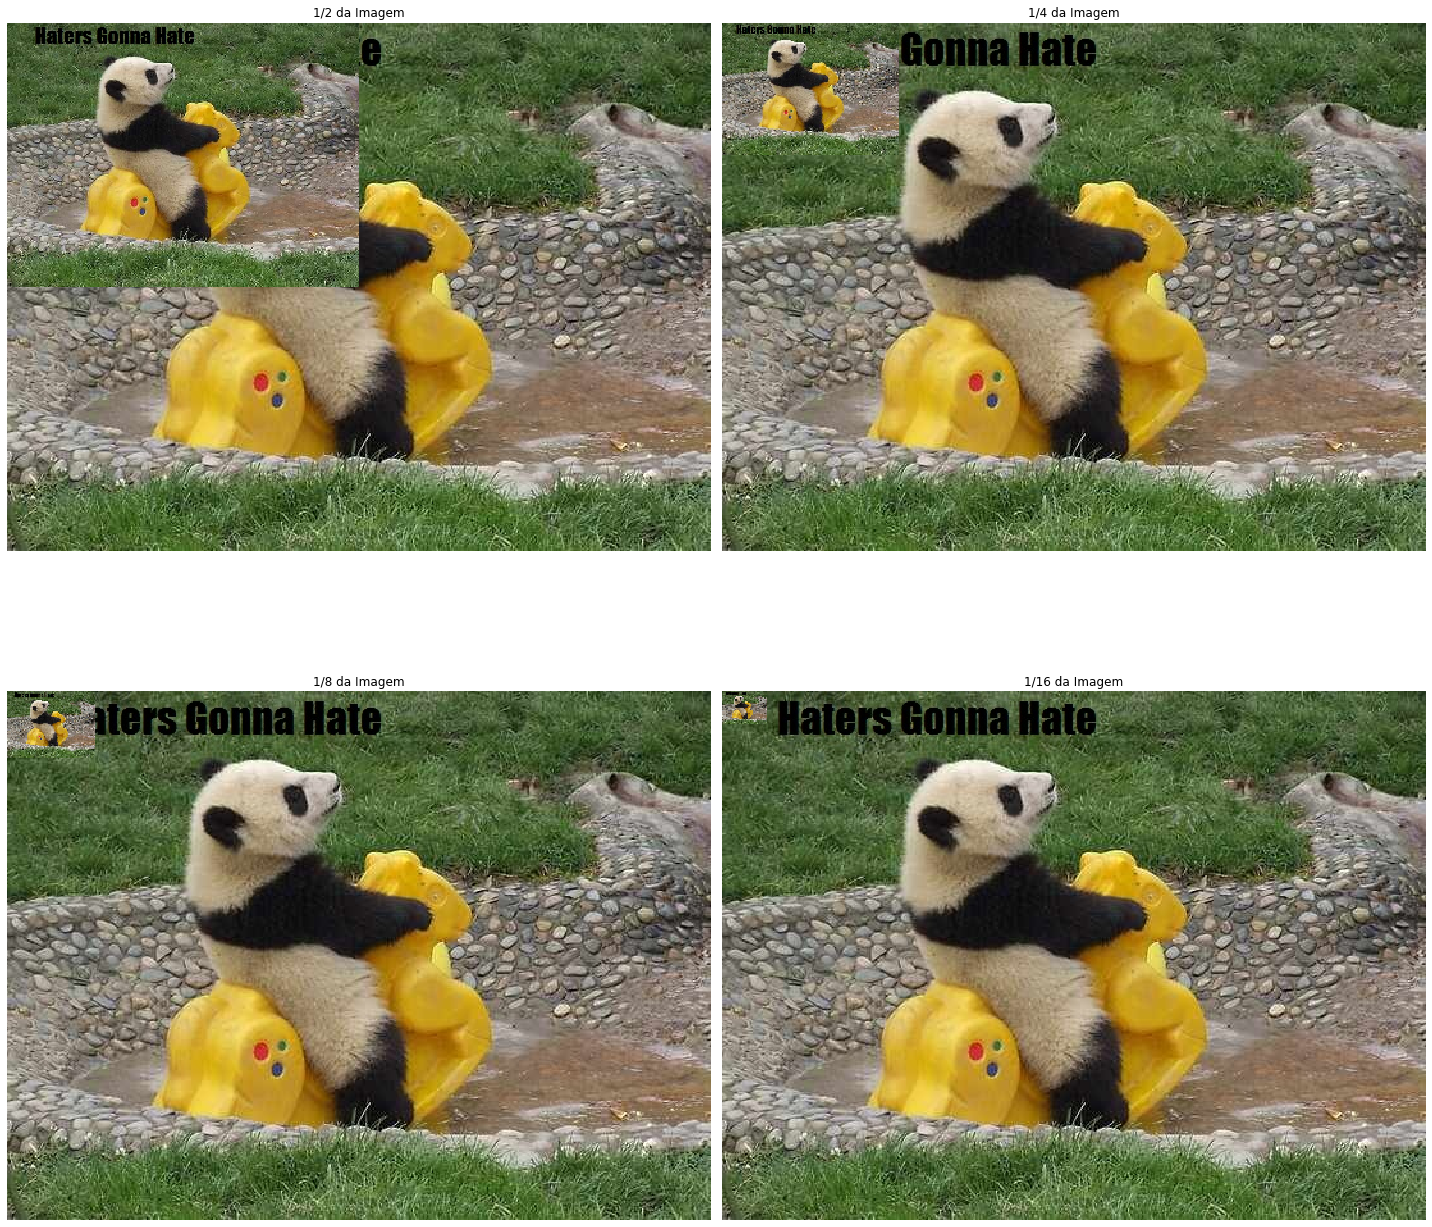

In [11]:
# Show images
image_to_plot_reduce = redifine_image_reduce_to_show_scale(imagem_reduce_array,
                                                           image_exercicio_1)
IMAGE_SIZE=[20,20]
show_subplots_image(image_to_plot_reduce, 2, 2, IMAGE_SIZE,
                    title_array=title_array)

In [12]:
proportion_expand_list = [2, 4, 8, 16]
expand_proportion = zip(imagem_reduce_array, proportion_expand_list)
imagem_vizinho = \
    [rescale_image(im_expand, proportion_ri=proportion, interpolation='vizinho')
     for im_expand, proportion in expand_proportion]

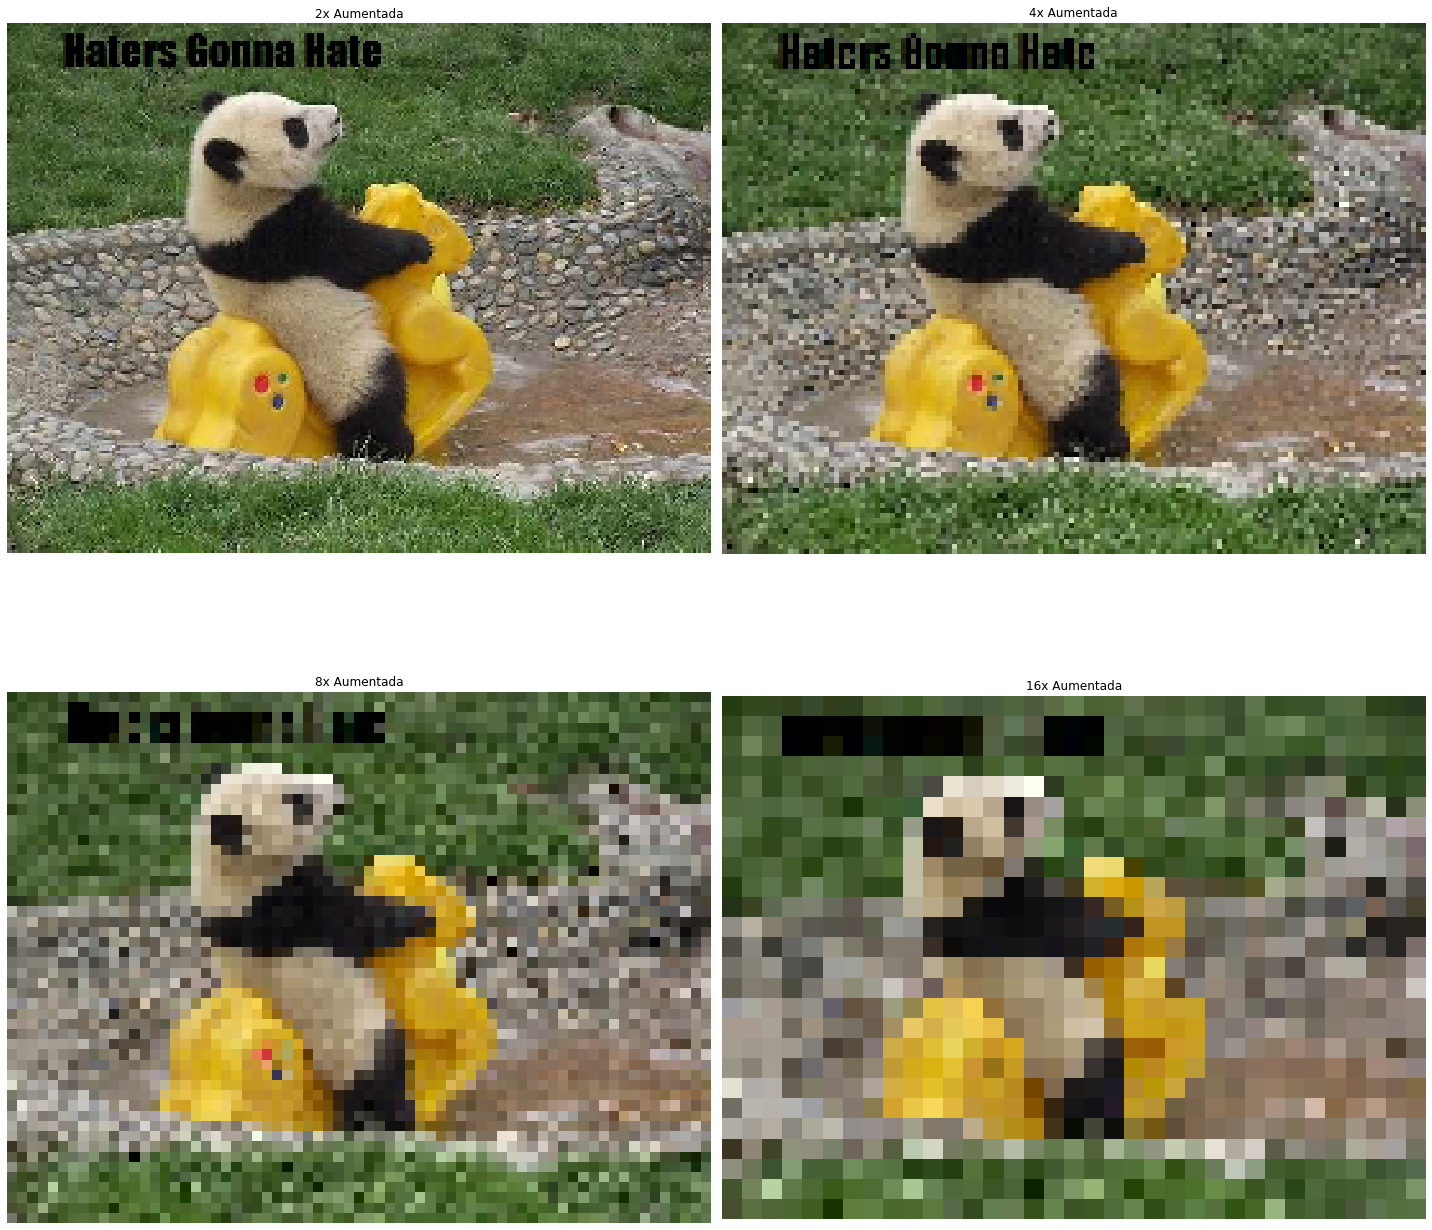

In [13]:
# Show images
title_expand = ['2x Aumentada', '4x Aumentada', '8x Aumentada', '16x Aumentada']
show_subplots_image(imagem_vizinho, 2, 2, IMAGE_SIZE, title_expand, 'gray')

<b>Resposta:</b><br><br>
É notável a diferença de qualidade entre a imagem original e sua cópia restaurada. O processo de reduzir a imagem obriga a perda dos pixels reais da imagem. Ao restaurar utilizando interpolação o algoritmo tenta inferir qual seriam os pixels que compunham as lacunas entre os pixeis originais ainda existentes na imagem reduzida. Assim, é muito difícil obter uma imagem identica à original através desse processo.

c) Modifique a função desenvolvida em (a), de forma que seja utilizada a técnica de interpolação bilinear e refaça o que se pede no item (b) novamente. (Obs.: Plote os resultados para que possam se visualizados). 

In [14]:
expand_proportion_bilinear = zip(imagem_reduce_array, proportion_expand_list)

In [15]:
imagem_bilinear = \
    [rescale_image(im_expand, proportion_ri=proportion, interpolation='bilinear')
     for im_expand, proportion in expand_proportion_bilinear]

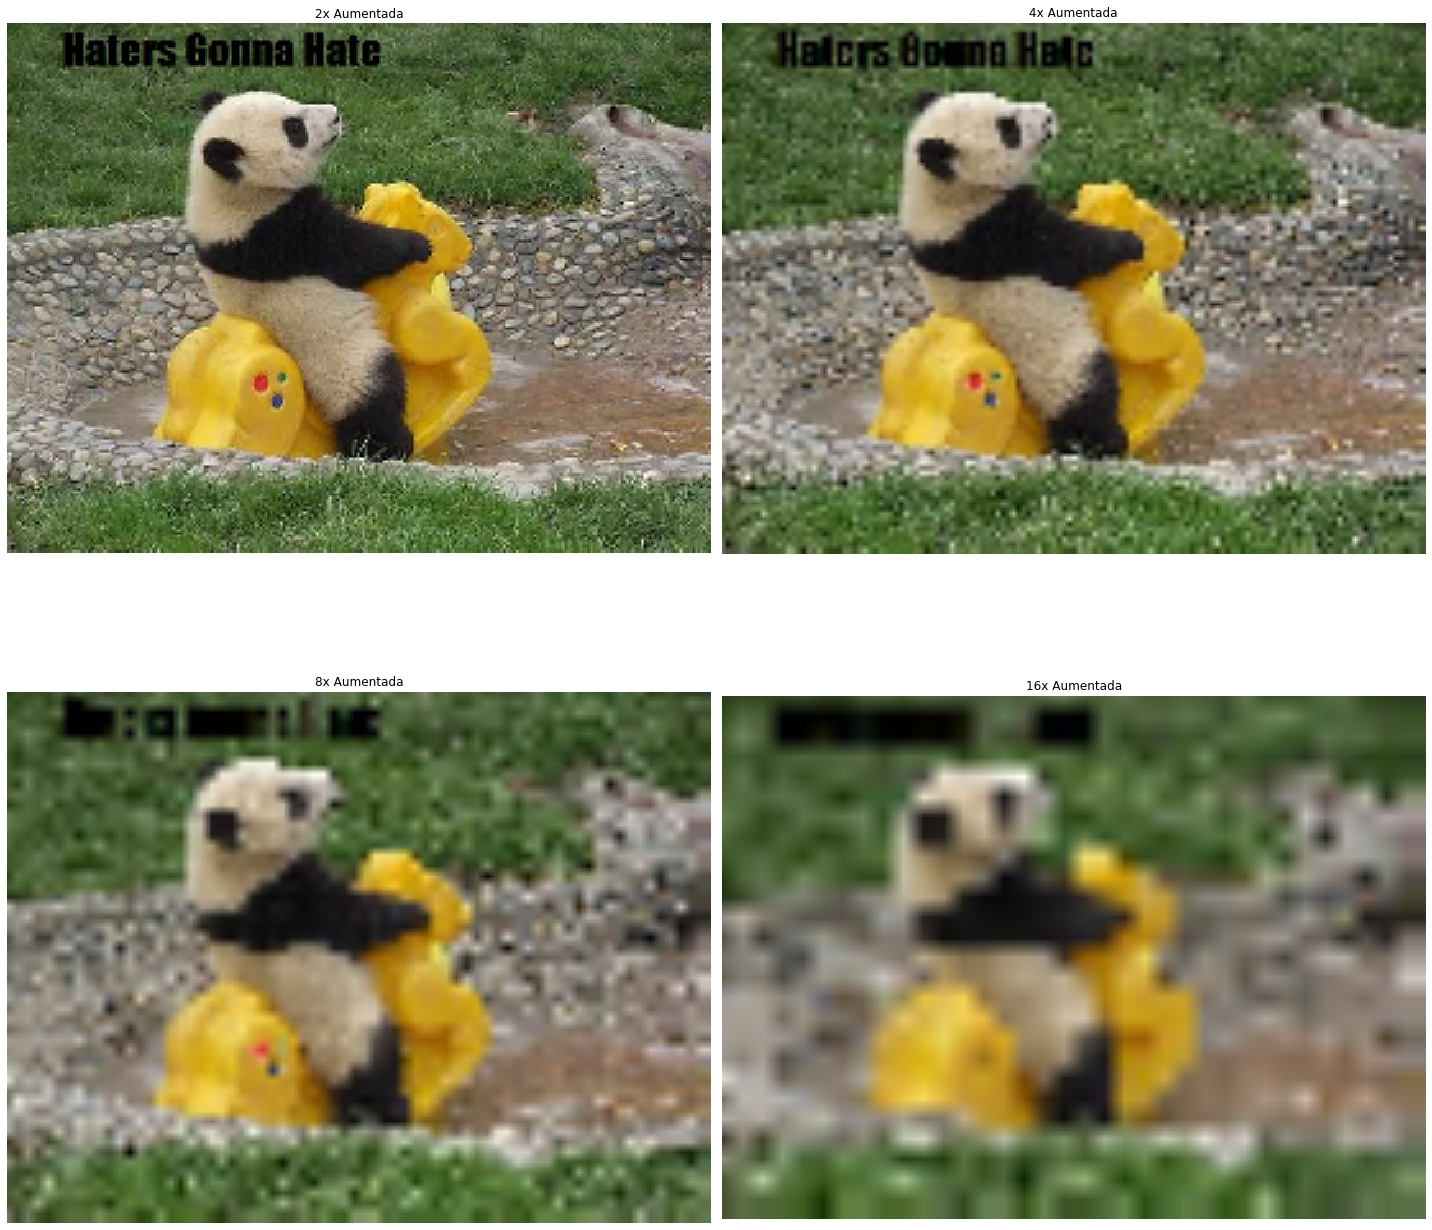

In [16]:
# Show images
show_subplots_image(imagem_bilinear, 2, 2, IMAGE_SIZE, title_expand)

<b>Resposta:</b><br><br>
Novamente pode-se observar que a imagem restaurada não possui a qualidade da imagem original pelo mesmo processo de perda e inferência dos pixeis no processo. No entanto, o algoritmo que utiliza a interpolação bilinear consegue obter uma suavização melhor ao inferir as lacunas entre os pixels originais. A qualidade nesse caso é superior ao método de restauração utilizando o algoritmo de vizinho mais próximo obtido no item anterior.

<b>Exercício 2</b>

a) Escreva uma função que realize a filtragem espacial de uma imagem. Essa função terá 2 parâmetros de entrada:  a imagem a ser transformada e o filtro a ser utilizado.

In [17]:
def filtragem_espacial(image_fe:np.array, filtro_fe:np.array):
    filtered_image = np.copy(image_fe)
    if np.size(image_fe[0,0]) == 1:
        filtered_image = filtragem_channel(image_fe, filtro_fe, rgb=False)
    else:
        for chn in range(np.size(image_fe[0,0])):
            filtered_image[:,:,chn] = filtragem_channel(image_fe[:,:,chn], filtro_fe)
    
    return filtered_image

In [18]:
# realiza a filtragem espacial aplicando o filtro na imagem
def filtragem_channel(image_fc:np.array, filtro_fc:np.array, rgb=True):
    padding_size = (int(filtro_fc.shape[0]/2), int(filtro_fc.shape[1]/2))
    imagem_transicao = np.copy(np.pad(image_fc, 
                                      padding_size, 
                                      'constant', 
                                      constant_values=(0)))
    imagem_filtrada = np.zeros(image_fc.shape)
    
    for i in range(padding_size[0], imagem_transicao.shape[0] - padding_size[0]):
        for j in range(padding_size[1], imagem_transicao.shape[1] - padding_size[1]):
            if i - 1 < image_fc.shape[0] and j - 1 < image_fc.shape[1]:
                imagem_filtrada[i - 1, j - 1] = int(np.sum(
                    (imagem_transicao[i-padding_size[0]:i+padding_size[0]+1,
                     j-padding_size[1]:j+padding_size[1]+1].flatten())*
                    (filtro_fc.flatten())))

    imagem_final = cv2.normalize(imagem_filtrada,None,alpha=np.min(imagem_filtrada), 
                                beta=np.max(imagem_filtrada), norm_type=cv2.NORM_MINMAX)
                
    return imagem_final

b) Aplique os filtros abaixo na imagem da Lena (que foi enviada com o trabalho). Compare os resultados obtidos para cada um dos filtros. Com base nestes resultados, qual o tipo de filtro (passa-alta, passa
baixa, passa-faixa, etc.)  que está sendo utilizado em cada caso e qual o efeito de cada filtro na imagem.

In [19]:
# carrega a imagem da lenna
image_exercicio_2 = cv2.imread('../imagens/lenna.png', cv2.IMREAD_GRAYSCALE)
IMAGE_SIZE = [12,12]

In [20]:
# carrega os filtros para o exercício
filter_list_exercicio_2b = [
                            np.array(np.dot((1/9),[[1,1,1],[1,1,1],[1,1,1]])),
                            np.array(np.dot((1/16),[[1,2,1],[2,4,2],[1,2,1]])),
                            np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]),
                            np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]),
                            np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
                        ]

# Título dos gráficos
filter_list_exercicio_2b_titles = ['Imagem Original',
                                   'Filtro de Média 1/9',
                                   'Filtro de Média 1/16',
                                   'Laplaciano com 5 no centro',
                                   'Laplaciano com 8 no centro',
                                   'Último filtro']

In [21]:
# Aplicar o filtro na imagem usando os filtros acima e Agrega a imagem original
image_filtered_list = \
    np.array([filtragem_espacial(image_exercicio_2, filter_2b) 
              for filter_2b in filter_list_exercicio_2b])
image_filtered_list = np.concatenate(([image_exercicio_2], image_filtered_list))

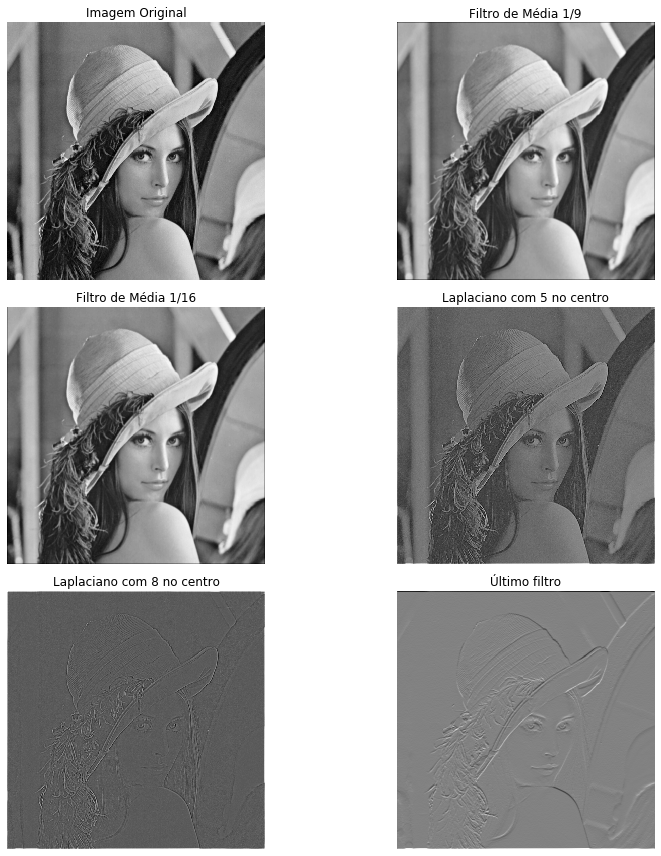

In [22]:
# exibe as imagens finais
show_subplots_image(image_filtered_list, 
                    3, 2, 
                    IMAGE_SIZE, 
                    filter_list_exercicio_2b_titles, 'gray')

c) O filtro 1 possui tamanho 3x3. O que aconteceria se aumentássemos o tamanho do filtro para 11x11, 17x17 ou 35x35? De que forma o tamanho do filtro afeta a imagem?

In [23]:
# Carrega os filtros de média multiplicado por 1/9 com vários tamanhos de matrix
filter_list_exercicio_2c = np.array([np.dot((1/9), np.ones((3,3))),
                            np.dot((1/9), np.ones((11,11))),
                            np.dot((1/9), np.ones((17,17))),
                            np.dot((1/9), np.ones((35,35)))])

# Carregas os títulos dos gráficos
ilter_list_exercicio_2c_titles = ['Filtro 3 x 3', 
                                  'Filtro 11 x 11', 
                                  'Filtro 17 x 17', 
                                  'Filtro 35 x 35']

In [24]:
# Aplicar o filtro na imagem usando os filtros acima
imagem_filtrada_list_exercicio_2c = \
    [filtragem_espacial(image_exercicio_2, filtro_2c) 
     for filtro_2c in filter_list_exercicio_2c]

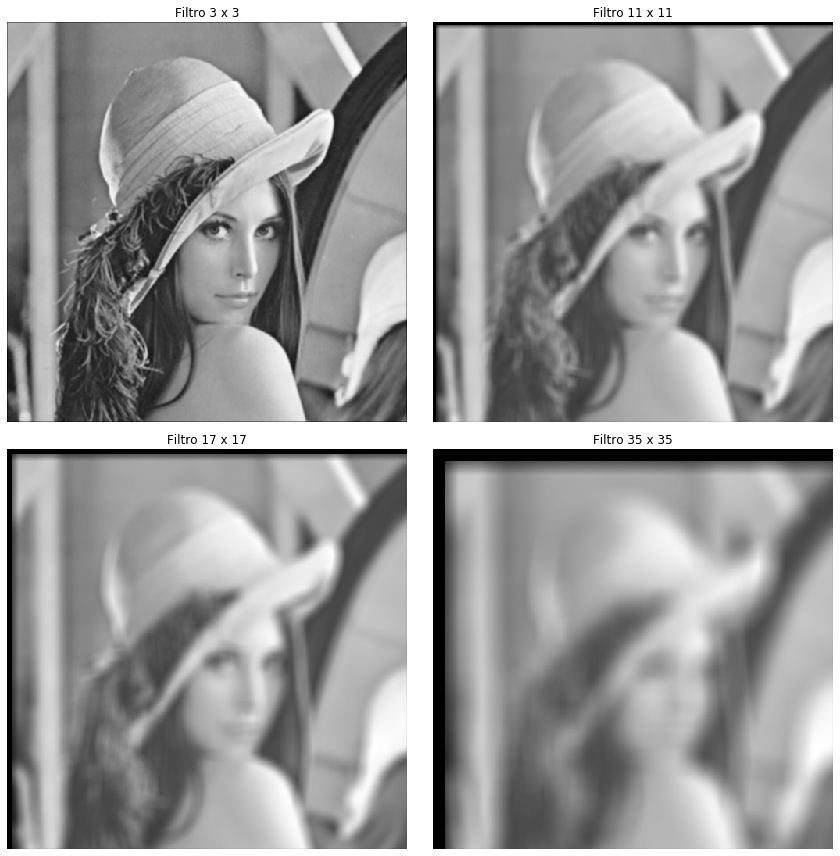

In [25]:
# Show images
show_subplots_image(imagem_filtrada_list_exercicio_2c, 
                    2, 2,
                    IMAGE_SIZE,
                    ilter_list_exercicio_2c_titles,
                    'gray')

<b>Exercício 3</b> - Neste exercício, vamos examinar a resposta em frequência dos seguintes filtros espaciais.

In [26]:
# Gera o modulo de uma lista de imagens
def gerar_modulo(image_filter_gm, s_gm:tuple=None, transform_gm=None):
    fft_image = np.fft.fft2(image_filter_gm, s=s_gm)   
    fft_filters_shift = np.fft.fftshift(fft_image)
    if transform_gm == None:
        return np.abs(fft_filters_shift)
    else:
        return np.abs(transform_gm(fft_image))

In [27]:
# Gera modulo de filtro e aplica a imagem transformada para obter o modulo 
# da transformada inversa
def gerar_modulo_imagem_filtrada(image_mod_filt_gmif, filter_list_gmif):
    # obter o modulo de uma lista de filtros
    fft_filters_shift_abs = \
        [gerar_modulo(filter_gmif, s_gm=image_mod_filt_gmif.shape) 
         for filter_gmif in filter_list_gmif]
    fft_image = np.fft.fft2(image_mod_filt_gmif)
    fft_image_shift = np.fft.fftshift(fft_image)
    fft_image_filtered_list = [fft_image_shift*filter_gmif 
                               for filter_gmif in fft_filters_shift_abs]
    ifft_shift_image_filtered_list = [np.fft.ifftshift(fft_image_filt) 
                                      for fft_image_filt in fft_image_filtered_list]
    img_back_list = [np.fft.ifft2(image_ifft_filt) 
                     for image_ifft_filt in ifft_shift_image_filtered_list]
    return [abs(image_complex) for image_complex in img_back_list]

a) Converta os filtros h1 e h2 para  o domínio da frequência. Visualize o módulo de cada filtro. Obs: Para visualizar melhor a resposta do filtro no domínio da frequência desloque a freq. (0,0) para o centro da imagem.

In [28]:
# Carregar a imagem que será utilizada no exercício
image_exercicio_3 = cv2.imread('../imagens/lenna.png', cv2.IMREAD_GRAYSCALE)

In [29]:
# Gerar of filtros
filters_list = list([np.dot(1/25,np.ones((5,5))), 
                     np.array([[1,2,1], [0,0,0],[-1,-2,-1]])])

# tamanho das imagens a serem exibidas
IMAGE_SIZE = [8,8]

In [30]:
# gerar o módulo no domínio de frequência dos filtros
title_array = ['Domínio de Frequência da Imagem', 'Domínio de Frequência do Filtro']
row_size, col_size = image_exercicio_3.shape
fft_filters_shift_abs = [gerar_modulo(filter_a, 
                         s_gm=(row_size, col_size)) 
                         for filter_a in filters_list]

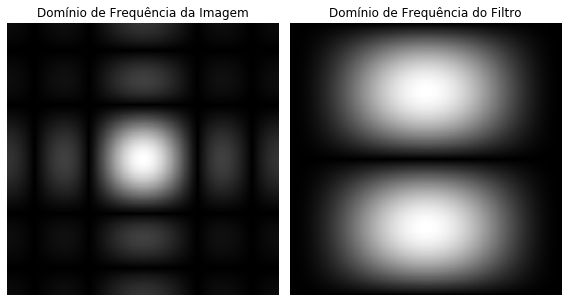

In [31]:
# exibir as imagens que representam os filtos no domínio de frequência
show_subplots_image(fft_filters_shift_abs, 1, 2, IMAGE_SIZE, title_array, cmap='gray')

b) Filtre, no domínio da frequência, três imagens (diferentes) com cada um dos dois filtro. Em seguida, tire a transformada inversa. O resultado da filtragem espacial é  o mesmo de filtragem no domínio da frequência? Justifique.

In [32]:
# Carregar as imagens
images_path_pokemon = ['../imagens/th35SNIA8N.jpg', 
                       '../imagens/thBRXJU7EY.jpg',
                       '../imagens/1200px-Scorbunny.png']
images_list_pokemon = [cv2.imread(pokemon, cv2.IMREAD_GRAYSCALE) 
                       for pokemon in images_path_pokemon]

In [33]:
# gerar o módulo no domínio de frequência das imagens
fft_filters_shift_abs = \
    [gerar_modulo(image_pokemon, transform_gm=np.log) 
     for image_pokemon in images_list_pokemon]

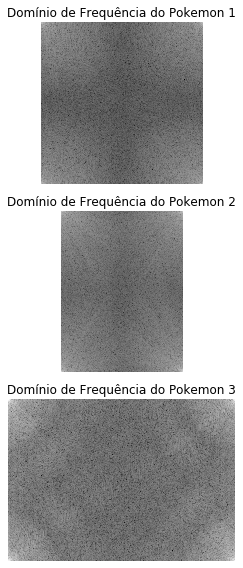

In [34]:
# exibir as imagens no domínio de frequência
title_array = ['Domínio de Frequência do Pokemon 1', 
               'Domínio de Frequência do Pokemon 2',
               'Domínio de Frequência do Pokemon 3']
show_subplots_image(fft_filters_shift_abs, 3, 1, IMAGE_SIZE, title_array, cmap='gray')

In [35]:
# aplicar a transformada inversa e obter o modulo da imagem após filtragem 
# no domínio de frequência'
img_back_abs_list = [gerar_modulo_imagem_filtrada(image_pokemon, filters_list) 
                     for image_pokemon in images_list_pokemon]

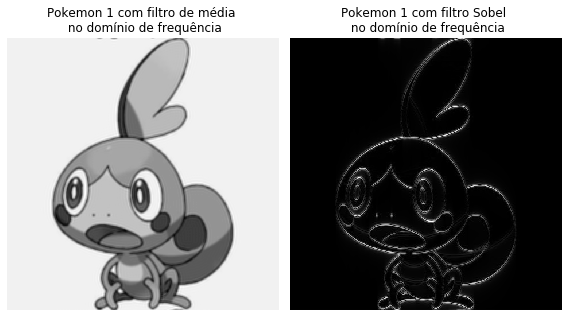

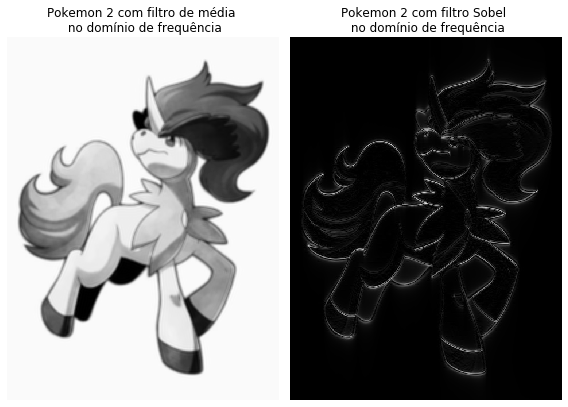

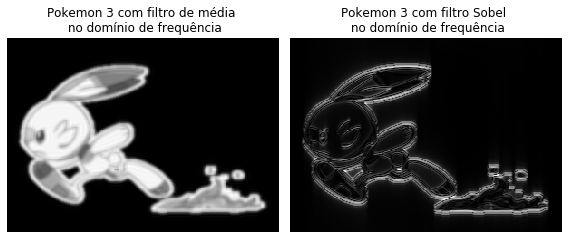

In [36]:
# Show images
for index, subplot_image in enumerate(img_back_abs_list):
    title_array = ['Pokemon {} com filtro de média \n no domínio de frequência'
                       .format(index + 1),
                   'Pokemon {} com filtro Sobel \n no domínio de frequência'
                       .format(index + 1)]
    show_subplots_image(subplot_image, 1, 2, IMAGE_SIZE, title_array, cmap='gray')

In [37]:
# aplicar os filtros às imagens
image_filtragem_espacial = [cv2.filter2D(image_pokemon, -1, filter_pokemon) 
                                for image_pokemon in images_list_pokemon 
                                for filter_pokemon in filters_list]

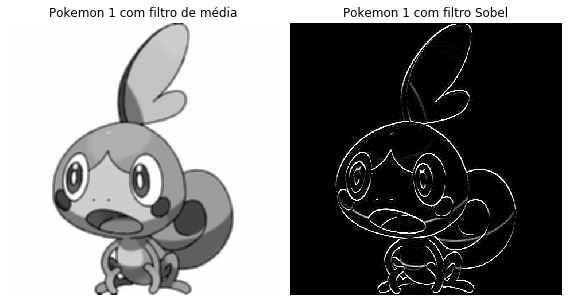

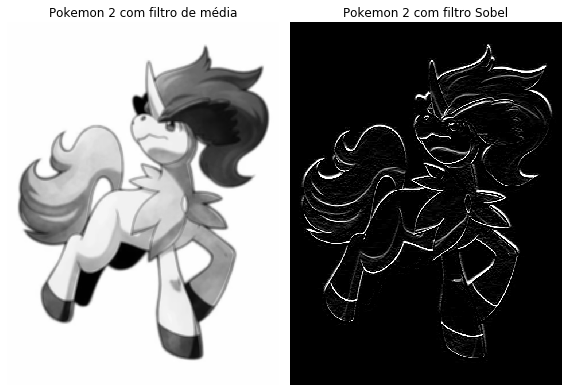

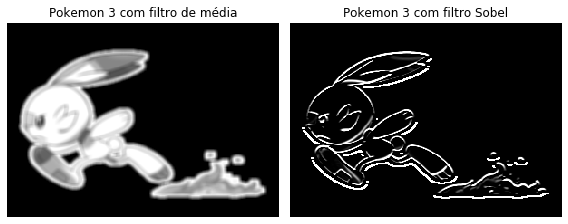

In [38]:
# exibir as imagens filtradas
image_filtragem_espacial = np.array(image_filtragem_espacial).reshape(-1,2)
for index, subplot_image in enumerate(image_filtragem_espacial):
    title_array = ['Pokemon {} com filtro de média'.format(index + 1), 
                   'Pokemon {} com filtro Sobel'.format(index + 1)]
    show_subplots_image(subplot_image, 1, 2, IMAGE_SIZE, title_array, cmap='gray')

Como observado a filtragem no domínio da frequência apresenta o mesmo resultado de uma filtragem sem aplicação de transformações nas imagens. Isso ocorre porque a transformada de Fourier decompõe as frequências em somas de frequências que totalizam a frequência original e é uma transformação reversível sem perda de informação. Portanto, ao se realizar a filtragem no domínio de frequência propaga a filtragem mantendo a estrutura necessária para uma completa reversibilidade a partir da transformação inversa de Fourier.

<b>Exercício 4</b>

a) Tire a transformada das imagens noiseball.png e footBallOrig.png (enviadas juntas com a atividade). Visualize o módulo destas transformadas. Há alguma diferença?  É possível recuperar a imagem noiseball.png  e eliminar o ruído? Justifique sua resposta.

In [39]:
# Carregar as imagens
images_list_ball_path = ['../imagens/footBallOrig.png', 
                         '../imagens/noiseball.png']
images_list_ball = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
                    for image_path in images_list_ball_path]
for img_inedx, image in enumerate(images_list_ball):
    images_list_ball[img_inedx] = \
        cv2.normalize(images_list_ball[img_inedx],
                      None,alpha=0,beta=1, 
                      norm_type=cv2.NORM_MINMAX,
                      dtype=cv2.CV_32F)

In [40]:
fft_filters_shift_abs_ball = [gerar_modulo(images_ball, transform_gm=np.log)
                              for images_ball in images_list_ball]

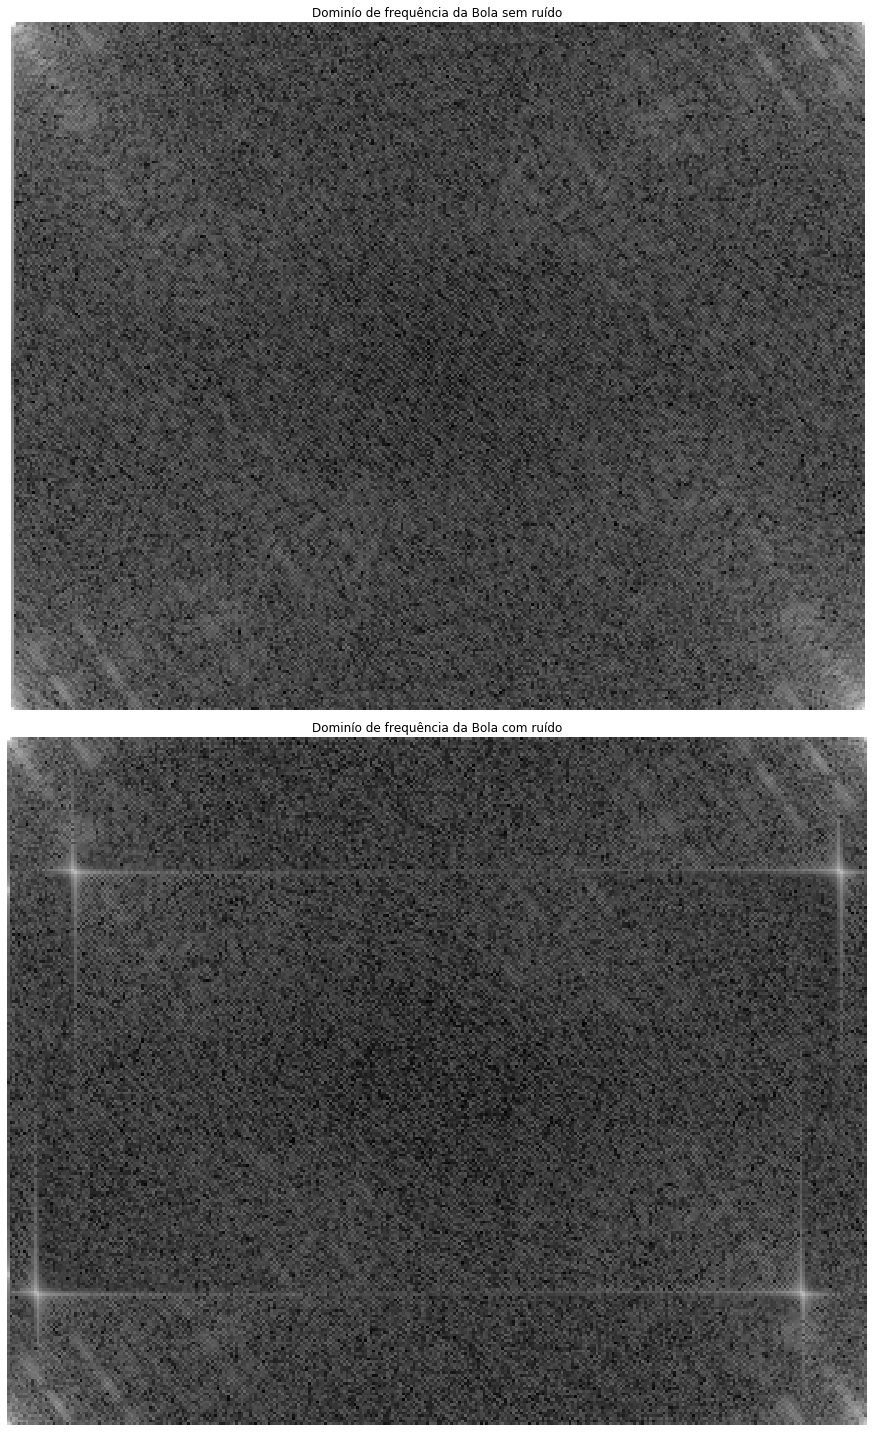

In [41]:
# Mostra as images no domínio de frequência
title_array = ['Dominío de frequência da Bola sem ruído',
               'Dominío de frequência da Bola com ruído']
show_subplots_image(fft_filters_shift_abs_ball, 
                    2, 1, 
                    [20,20], 
                    title_array, 
                    cmap='gray')

 b) Tire a transformada inversa da imagem filtrada e visualize o resultado. Comente.

In [42]:
# Carregar os filtros
filters_list_ball = \
    list([np.array(np.dot(1/25,[[2,4,4,4,2], 
                                [2,4,4,4,2], 
                                [2,4,4,4,2], 
                                [2,4,4,4,2], 
                                [2,4,4,4,2]]))])

In [43]:
# Aplicar o filtro às imagens no domínio de frequência e proceder 
# com a transformada inversa
img_back_abs_list = \
    gerar_modulo_imagem_filtrada(images_list_ball[1], filters_list_ball)

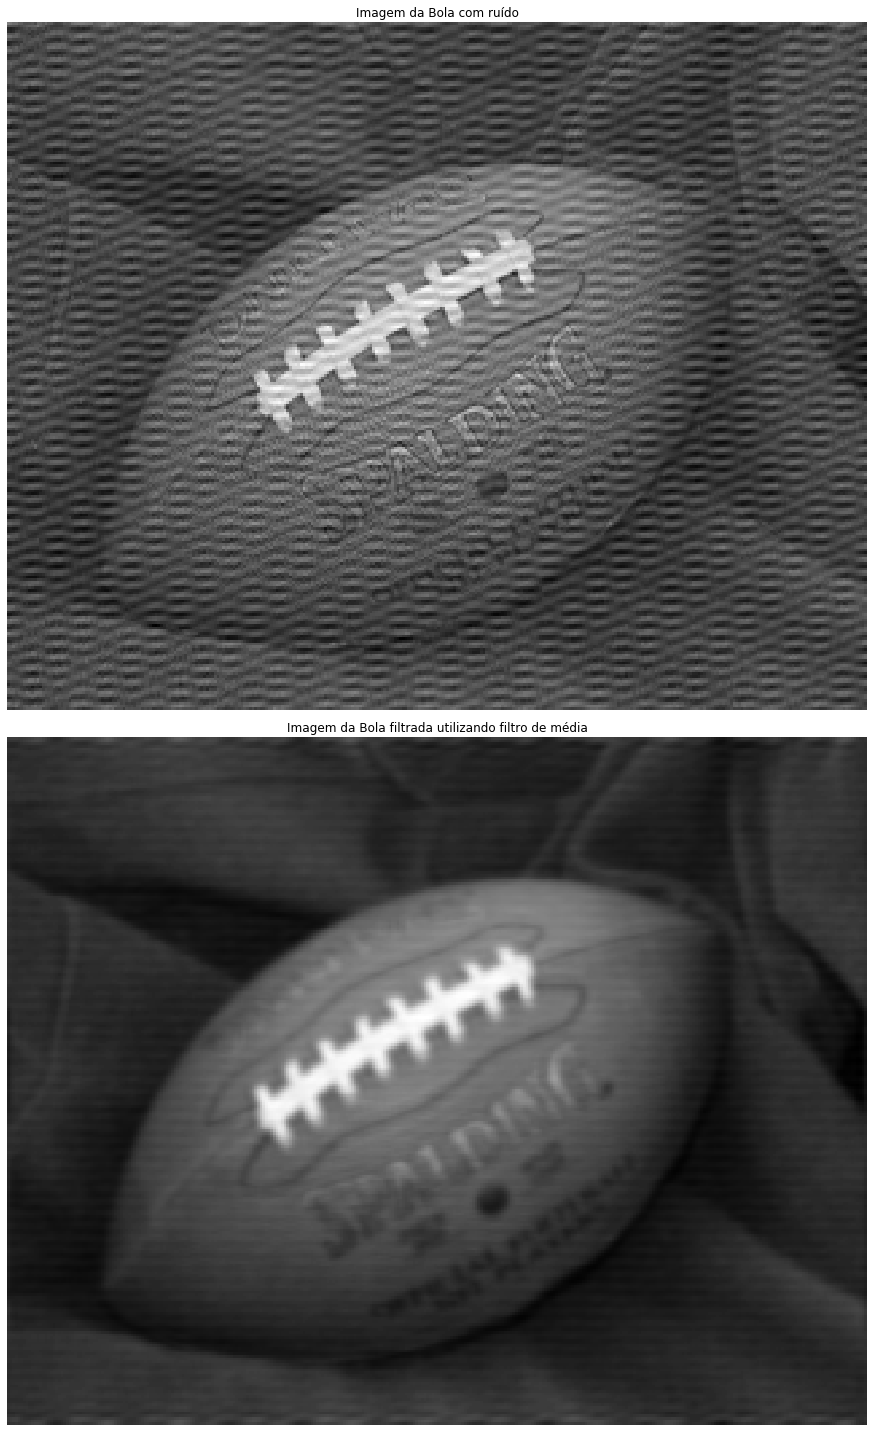

In [44]:
# Mostrar a imagem filtrada
final_image_filtered = [images_list_ball[1], 
                        img_back_abs_list[0]]
title_array = ['Imagem da Bola com ruído',
               'Imagem da Bola filtrada utilizando filtro de média']
show_subplots_image(final_image_filtered, 2, 1, [20,20], title_array, cmap='gray')

É possível verificar que apesar de ter perdido um pouco de nitidez o ruído foi praticamente todo eliminado. Nesse caso foi utilizado um filtro de média, pois o objetivo era usar um filtro de passa-baixo. Observando a imagem com ruído no domínio de frequência pode-se perceber que existem picos de frequência e nesse caso o filtro selecionado apresenta um resultado positivo como obtido no resultado.